In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import gmpy2
from scipy.signal import savgol_filter
from random import randint
from itertools import chain

In [27]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [39]:
%%cython
def ext_eucl(a, b):
    x1 = 1
    x2 = 0
    y1 = 0
    y2 = 1
    n_it = 0
    while b != 0:
        n_it += 1
        q = a // b
        a = a % b
        a, b = b, a
        x1 -= x2 * q
        x1, x2 = x2, x1
        y1 -= y2 * q
        y1, y2 = y2, y1
    return n_it #a, x1, y1 

In [29]:
ext_eucl(11, 5)

(1, 1, -2)

In [30]:
#Number length in binary representation
len_from = 10
len_to = 40
#Number of primes of given length
pr_num = 10

In [35]:
%%time
nums = np.empty([len_to - len_from, pr_num], dtype=object)
for pr_len in range(len_from, len_to):
    for pr_count in range(pr_num):
        num = randint(2**pr_len, 2**(pr_len + 1))
        nums[pr_len - len_from][pr_count] = num
    nums[pr_len - len_from] = sorted(nums[pr_len - len_from])
nums = list(chain.from_iterable(nums))

CPU times: user 3.96 ms, sys: 0 ns, total: 3.96 ms
Wall time: 3.94 ms


In [40]:
n_it = []
for i in range(len(nums) - 1):
    n_it.append((nums[i], ext_eucl(nums[i], nums[i + 1])))


In [43]:
n_it

[(1121, 8),
 (1205, 6),
 (1326, 6),
 (1383, 5),
 (1408, 8),
 (1513, 4),
 (1581, 8),
 (1833, 6),
 (1866, 5),
 (2035, 5),
 (2078, 7),
 (2129, 8),
 (2428, 9),
 (2523, 3),
 (2552, 9),
 (2713, 9),
 (2970, 4),
 (3456, 8),
 (3729, 9),
 (3952, 6),
 (4303, 8),
 (5821, 7),
 (6155, 3),
 (6160, 8),
 (6499, 8),
 (6689, 7),
 (7015, 6),
 (7031, 9),
 (7881, 6),
 (7932, 10),
 (9752, 8),
 (11555, 8),
 (11679, 6),
 (11957, 9),
 (12246, 6),
 (13582, 7),
 (14934, 6),
 (15360, 9),
 (15711, 9),
 (16374, 9),
 (18676, 9),
 (18870, 6),
 (20349, 8),
 (24096, 9),
 (27626, 9),
 (28616, 7),
 (28709, 11),
 (28967, 6),
 (30378, 11),
 (31303, 7),
 (34642, 12),
 (48545, 7),
 (53756, 8),
 (54018, 7),
 (55494, 10),
 (56983, 11),
 (58334, 11),
 (63725, 6),
 (64863, 7),
 (64980, 11),
 (77603, 9),
 (82691, 13),
 (90723, 8),
 (90861, 14),
 (97474, 11),
 (105964, 11),
 (110960, 8),
 (119467, 9),
 (130083, 7),
 (130999, 11),
 (133868, 12),
 (152897, 8),
 (155164, 11),
 (178452, 6),
 (178665, 11),
 (189106, 9),
 (200247, 12),
 

In [48]:
worst_x = [x[0] for x in n_it]
worst_y = [np.log2(x[0]) for x in n_it]

<IPython.core.display.Javascript object>


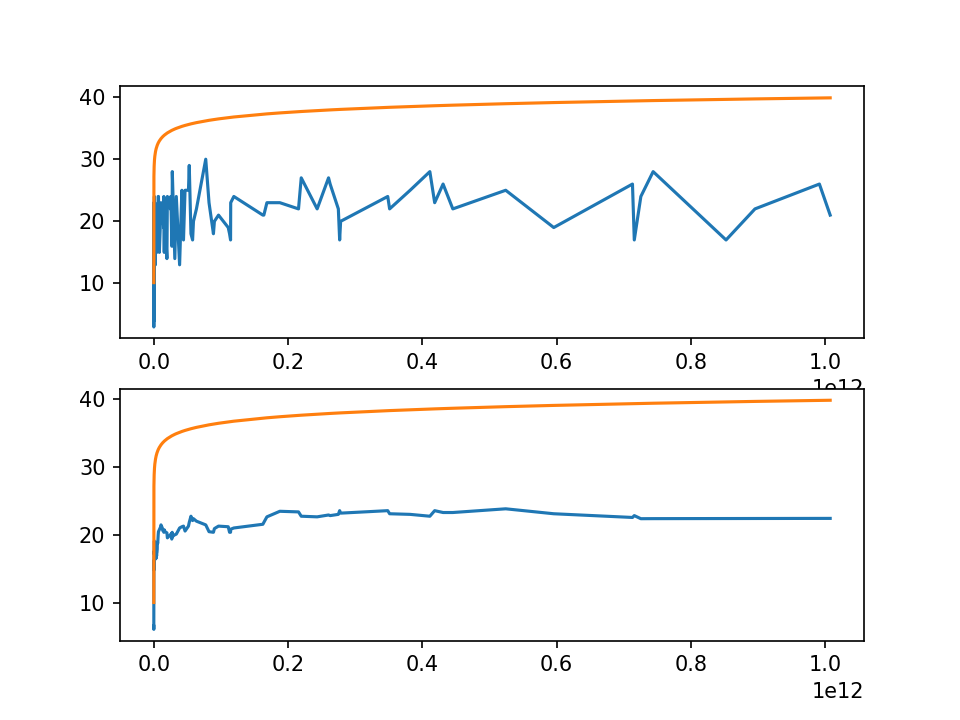

In [53]:
plt.figure(1)
plt.subplot(211)
plt.plot([x[0] for x in n_it], [x[1] for x in n_it])
plt.plot(worst_x, worst_y)
plt.subplot(212)
plt.plot([x[0] for x in n_it], savgol_filter([x[1] for x in n_it], pr_num + 1, 1))
plt.plot(worst_x, worst_y)
plt.show()